In [0]:
import gensim
import csv
import warnings
import random
import numpy as np
import geopandas as gpd
warnings.filterwarnings('ignore')

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [0]:
countries = list(csv.DictReader(open('countries.csv')))

In [0]:
country_to_idx = {country['name']: idx for idx, country in enumerate(countries)}
country_vecs = np.asarray([model[c['name']] for c in countries])

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [0]:
def rank_countries(term, topn=10, field='name'):
    if not term in model:
        return []
    vec = model[term]
    dists = np.dot(country_vecs, vec)
    return [(countries[idx][field], float(dists[idx])) 
            for idx in reversed(np.argsort(dists)[-topn:])]

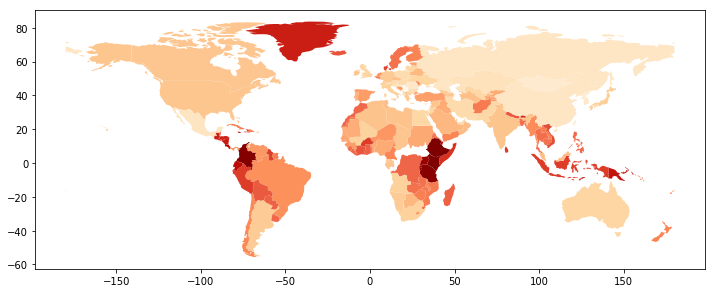

In [14]:
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
figsize(12, 8)
def map_term(term):
    d = {k.upper(): v for k, v in rank_countries(term, topn=0, field='cc3')}
    world[term] = world['iso_a3'].map(d)
    world[term] /= world[term].max()
    world.dropna().plot(term, cmap='OrRd')

map_term('coffee')